### Curso de Python para Finanças Quantitativas

#### Aula 5 - Mapa do IFR e RSL
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

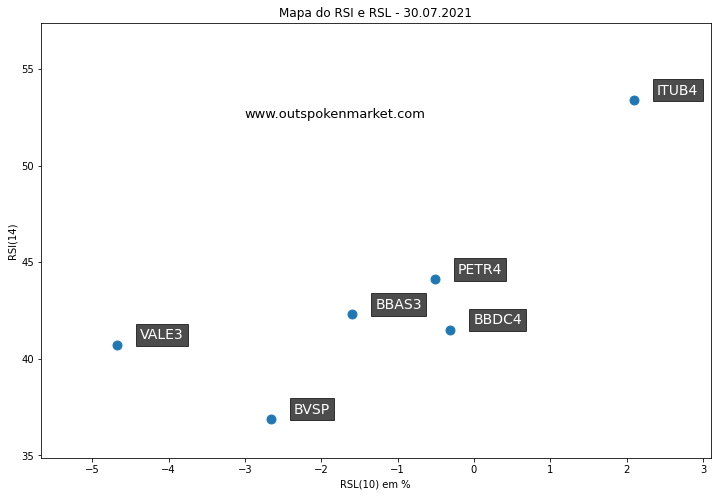

In [ ]:
#!pip install ta
#!pip install yfinance --upgrade --no-cache-dir

In [1]:
# Carregando as bibliotecas necessarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as fplt
from pandas_datareader import data as pdr
from datetime import date
import ta
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

___________________________________________

### Tratamento dos dados

In [2]:
# Parametros da funçao

tickers = ["^BVSP", "PETR4.SA", "ITUB4.SA", "VALE3.SA", "BBDC4.SA", "BBAS3.SA"]
inicio = "2021-01-01"
fim = "2021-07-31"

In [3]:
ibov = pdr.get_data_yahoo(tickers, start = inicio, end = fim)

[*********************100%***********************]  6 of 6 completed


In [4]:
ibov

Adj Close                                                         \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA    VALE3.SA     ^BVSP   
Date                                                                           
2021-01-04  36.207413  23.366058  30.404240  27.968693   85.822533  118558.0   
2021-01-05  35.831757  23.223598  30.207445  29.061901   87.267601  119223.0   
2021-01-06  36.650497  23.993298  31.093006  29.119946   90.129608  119851.0   
2021-01-07  38.104958  24.630287  32.303280  29.990643   96.013130  121956.0   
2021-01-08  38.326496  24.417955  32.293430  30.106735   95.712852  125077.0   
...               ...        ...        ...        ...         ...       ...   
2021-07-26  32.270000  24.150000  29.530001  27.469999  116.599998  126004.0   
2021-07-27  32.419998  24.340000  29.820000  27.150000  114.180000  124612.0   
2021-07-28  32.900002  24.910000  30.790001  27.709999  117.300003  126286.0   
2021-07-29  32.380001  24.670000  30.629999  27.809999  115.570000  125675.0   
2021-07-30  31.629999  24.250000  30.299999  26.910000  108.760002  121801.0   

                Close                                   ...       Open  \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA  ...   ITUB4.SA   
Date                                                    ...              
2021-01-04  37.590000  24.027271  30.900000  28.910000  ...  31.980000   
2021-01-05  37.200001  23.863636  30.700001  30.040001  ...  30.730000   
2021-01-06  38.049999  24.654545  31.600000  30.100000  ...  30.980000   
2021-01-07  39.560001  25.309090  32.830002  31.000000  ...  31.650000   
2021-01-08  39.790001  25.090908  32.820000  31.120001  ...  32.930000   
...               ...        ...        ...        ...  ...        ...   
2021-07-26  32.270000  24.150000  29.530001  27.469999  ...  29.080000   
2021-07-27  32.419998  24.340000  29.820000  27.150000  ...  29.500000   
2021-07-28  32.900002  24.910000  30.790001  27.709999  ...  30.150000   
2021-07-29  32.380001  24.670000  30.629999  27.809999  ...  30.879999   
2021-07-30  31.629999  24.250000  30.299999  26.910000  ...  30.400000   

                                                 Volume              \
             PETR4.SA    VALE3.SA     ^BVSP    BBAS3.SA    BBDC4.SA   
Date                                                                  
2021-01-04  28.650000   89.349998  119024.0  13874600.0  43814870.0   
2021-01-05  28.900000   91.459999  118835.0  15954000.0  42824980.0   
2021-01-06  30.160000   94.980003  119377.0  20566700.0  66652190.0   
2021-01-07  30.340000   96.610001  119103.0  21878700.0  51405090.0   
2021-01-08  31.459999  103.010002  122387.0  16240300.0  55328570.0   
...               ...         ...       ...         ...         ...   
2021-07-26  26.740000  114.440002  125058.0   6037800.0  30532000.0   
2021-07-27  27.350000  115.699997  126004.0   7467500.0  36264700.0   
2021-07-28  27.430000  115.500000  124615.0   9125400.0  47380600.0   
2021-07-29  27.799999  116.370003  126285.0   7613100.0  31963800.0   
2021-07-30  27.600000  113.510002  125672.0  13410200.0  36570000.0   

                                                            
              ITUB4.SA    PETR4.SA    VALE3.SA       ^BVSP  
Date                                                        
2021-01-04  31347800.0  74719700.0  37865500.0   8741400.0  
2021-01-05  28249800.0  95181100.0  34300300.0   9257100.0  
2021-01-06  43061900.0  96562500.0  53722500.0  11638200.0  
2021-01-07  46129800.0  56171300.0  74541400.0  11774800.0  
2021-01-08  52532500.0  67136300.0  58562700.0  11085800.0  
...                ...         ...         ...         ...  
2021-07-26  24167700.0  46802600.0  16419900.0   6325500.0  
2021-07-27  36435400.0  51901800.0  22106500.0   7313800.0  
2021-07-28  69662900.0  46727100.0  25209200.0   9038200.0  
2021-07-29  23202200.0  43916600.0  30576800.0   7488400.0  
2021-07-30  42493300.0  74150400.0  41956700.0   9399200.0  

[143

In [7]:
ibov["Adj Close"][["PETR4.SA", "^BVSP", "VALE3.SA"]]

,PETR4.SA,^BVSP,VALE3.SA
Date,,,
2021-01-04,27.968693,118558.0,85.822533
2021-01-05,29.061901,119223.0,87.267601
2021-01-06,29.119946,119851.0,90.129608
2021-01-07,29.990643,121956.0,96.013130
2021-01-08,30.106735,125077.0,95.712852
...,...,...,...
2021-07-26,27.469999,126004.0,116.599998
2021-07-27,27.150000,124612.0,114.180000
2021-07-28,27.709999,126286.0,117.300003


In [9]:
df_mapa = ibov["Adj Close"][tickers]

In [8]:
tickers

['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBDC4.SA', 'BBAS3.SA']

In [10]:
df_mapa.head()

,^BVSP,PETR4.SA,ITUB4.SA,VALE3.SA,BBDC4.SA,BBAS3.SA
Date,,,,,,
2021-01-04,118558.0,27.968693,30.404240,85.822533,23.366058,36.207413
2021-01-05,119223.0,29.061901,30.207445,87.267601,23.223598,35.831757
2021-01-06,119851.0,29.119946,31.093006,90.129608,23.993298,36.650497
2021-01-07,121956.0,29.990643,32.303280,96.013130,24.630287,38.104958
2021-01-08,125077.0,30.106735,32.293430,95.712852,24.417955,38.326496


In [11]:
df_mapa.rename(columns = {"^BVSP": "BVSP_Close", "PETR4.SA": "PETR_Close"
                          , "ITUB4.SA": "ITUB_Close", "VALE3.SA": "VALE_Close"
                          , "BBDC4.SA": "BBDC_Close", "BBAS3.SA": "BBAS_Close"}, inplace = True)
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close
Date,,,,,,
2021-01-04,118558.0,27.968693,30.404240,85.822533,23.366058,36.207413
2021-01-05,119223.0,29.061901,30.207445,87.267601,23.223598,35.831757
2021-01-06,119851.0,29.119946,31.093006,90.129608,23.993298,36.650497
2021-01-07,121956.0,29.990643,32.303280,96.013130,24.630287,38.104958
2021-01-08,125077.0,30.106735,32.293430,95.712852,24.417955,38.326496


In [12]:
# Calculando o RSL de 10 periodos

p = 10

df_mapa["MM_bvsp"] = df_mapa["BVSP_Close"].rolling(p).mean()
df_mapa["MM_petro"] = df_mapa["PETR_Close"].rolling(p).mean()
df_mapa["MM_itub"] = df_mapa["ITUB_Close"].rolling(p).mean()
df_mapa["MM_vale"] = df_mapa["VALE_Close"].rolling(p).mean()
df_mapa["MM_bbdc"] = df_mapa["BBDC_Close"].rolling(p).mean()
df_mapa["MM_bbas"] = df_mapa["BBAS_Close"].rolling(p).mean()

df_mapa["RSL_BVSP"] = (df_mapa["BVSP_Close"]/df_mapa["MM_bvsp"] - 1)*100
df_mapa["RSL_PETR"] = (df_mapa["PETR_Close"]/df_mapa["MM_petro"] - 1)*100
df_mapa["RSL_ITUB"] = (df_mapa["ITUB_Close"]/df_mapa["MM_itub"] - 1)*100
df_mapa["RSL_VALE"] = (df_mapa["VALE_Close"]/df_mapa["MM_vale"] - 1)*100
df_mapa["RSL_BBDC"] = (df_mapa["BBDC_Close"]/df_mapa["MM_bbdc"] - 1)*100
df_mapa["RSL_BBAS"] = (df_mapa["BBAS_Close"]/df_mapa["MM_bbas"] - 1)*100



In [13]:
# Calculando o RSI (IFR) de 2 e 14 periodos


petr_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 2)
petr_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 14)

bvsp_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 2)
bvsp_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 14)

itub_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 2)
itub_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 14)

vale_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 2)
vale_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 14)

bbdc_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 2)
bbdc_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 14)

bbas_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 2)
bbas_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 14)


df_mapa["RSI2_PETR"] = petr_rsi2.rsi()
df_mapa["RSI14_PETR"] = petr_rsi14.rsi()

df_mapa["RSI2_BVSP"] = bvsp_rsi2.rsi()
df_mapa["RSI14_BVSP"] = bvsp_rsi14.rsi()

df_mapa["RSI2_ITUB"] = itub_rsi2.rsi()
df_mapa["RSI14_ITUB"] = itub_rsi14.rsi()

df_mapa["RSI2_VALE"] = vale_rsi2.rsi()
df_mapa["RSI14_VALE"] = vale_rsi14.rsi()

df_mapa["RSI2_BBDC"] = bbdc_rsi2.rsi()
df_mapa["RSI14_BBDC"] = bbdc_rsi14.rsi()

df_mapa["RSI2_BBAS"] = bbas_rsi2.rsi()
df_mapa["RSI14_BBAS"] = bbas_rsi14.rsi()

In [14]:
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,MM_bvsp,MM_petro,MM_itub,MM_vale,...,RSI2_BVSP,RSI14_BVSP,RSI2_ITUB,RSI14_ITUB,RSI2_VALE,RSI14_VALE,RSI2_BBDC,RSI14_BBDC,RSI2_BBAS,RSI14_BBAS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,118558.0,27.968693,30.404240,85.822533,23.366058,36.207413,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,119223.0,29.061901,30.207445,87.267601,23.223598,35.831757,NaN,NaN,NaN,NaN,...,100.0,NaN,0.000000,NaN,100.000000,NaN,0.000000,NaN,0.000000,NaN
2021-01-06,119851.0,29.119946,31.093006,90.129608,23.993298,36.650497,NaN,NaN,NaN,NaN,...,100.0,NaN,89.999855,NaN,100.000000,NaN,91.529614,NaN,81.339771,NaN
2021-01-07,121956.0,29.990643,32.303280,96.013130,24.630287,38.104958,NaN,NaN,NaN,NaN,...,100.0,NaN,97.109793,NaN,100.000000,NaN,96.632008,NaN,95.202948,NaN
2021-01-08,125077.0,30.106735,32.293430,95.712852,24.417955,38.326496,NaN,NaN,NaN,NaN,...,100.0,NaN,95.998859,NaN,92.743715,NaN,68.944536,NaN,96.088255,NaN


In [15]:
# Filtrando os valores missing

df_mapa = df_mapa.dropna(axis = 0) 

In [16]:
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,MM_bvsp,MM_petro,MM_itub,MM_vale,...,RSI2_BVSP,RSI14_BVSP,RSI2_ITUB,RSI14_ITUB,RSI2_VALE,RSI14_VALE,RSI2_BBDC,RSI14_BBDC,RSI2_BBAS,RSI14_BBAS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-21,118443.0,26.652973,29.430128,87.605415,22.542374,32.922840,121797.1,28.234738,30.988709,90.532162,...,6.845717,42.502148,3.543176,35.460653,48.482041,46.895591,4.486869,34.875176,0.487211,23.692005
2021-01-22,117172.0,26.207952,28.800396,87.427124,22.126560,32.450859,121006.6,27.844860,30.639405,89.703590,...,3.230023,38.404617,1.460299,30.987206,41.993542,46.319127,2.126667,30.885021,0.252849,21.784964
2021-01-26,116464.0,26.120882,27.844473,86.094650,21.595737,31.583963,120372.3,27.471428,30.267322,88.743645,...,2.033476,36.304954,0.524399,25.689346,13.995875,42.149079,0.907655,26.687299,0.091379,18.792853
2021-01-27,115882.0,26.507858,27.844473,83.701828,21.905384,32.508648,119560.7,27.158945,29.885399,87.806223,...,1.263785,34.628931,0.524399,25.689346,4.123061,35.898829,40.618344,32.454483,57.707817,29.859172
2021-01-28,119314.0,26.856136,28.968109,85.484718,22.586607,33.269592,119288.1,27.024471,29.667989,87.325782,...,81.929947,49.449063,75.213868,39.735351,53.258107,42.715121,78.510413,43.065719,78.302192,37.417191


In [20]:
df_mapa["RSL_PETR"].tail(1)[0]

-0.5102030742443753

___________________________________________

### Criando o mapa

In [32]:
# Preparando o dataframe

# Agrupando os dados
indicadores = [
                  ["PETR4", df_mapa["RSL_PETR"].tail(1)[0], df_mapa["RSI14_PETR"].tail(1)[0]]
                , ["BVSP", df_mapa["RSL_BVSP"].tail(1)[0], df_mapa["RSI14_BVSP"].tail(1)[0]]
                , ["ITUB4", df_mapa["RSL_ITUB"].tail(1)[0], df_mapa["RSI14_ITUB"].tail(1)[0]]
                , ["VALE3", df_mapa["RSL_VALE"].tail(1)[0], df_mapa["RSI14_VALE"].tail(1)[0]]
                , ["BBDC4", df_mapa["RSL_BBDC"].tail(1)[0], df_mapa["RSI14_BBDC"].tail(1)[0]]
                , ["BBAS3", df_mapa["RSL_BBAS"].tail(1)[0], df_mapa["RSI14_BBAS"].tail(1)[0]]
              ]
 
# Criar o DataFrame do pandas
mapa = pd.DataFrame(indicadores, columns = ["Ativo", "RSL", "RSI14"])

mapa.head(6)

,Ativo,RSL,RSI14
0,PETR4,-0.510203,44.115539
1,BVSP,-2.660667,36.876241
2,ITUB4,2.099266,53.386460
3,VALE3,-4.670914,40.724499
4,BBDC4,-0.308325,41.506953
5,BBAS3,-1.592935,42.305009


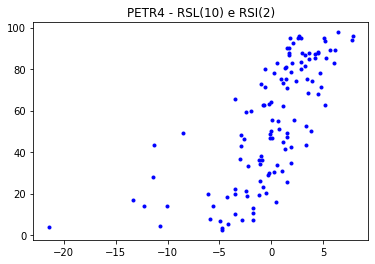

In [22]:
# Algumas considerações interessantes

plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI2_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(2)");

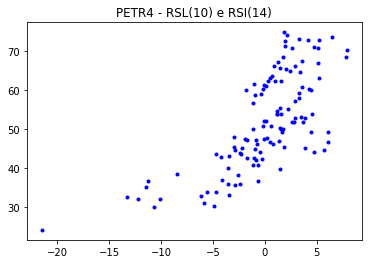

In [23]:
plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI14_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(14)");

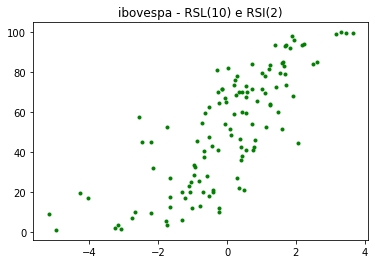

In [24]:
plt.plot(df_mapa["RSL_BVSP"], df_mapa["RSI2_BVSP"], ".", color = "green")
plt.title("ibovespa - RSL(10) e RSI(2)");

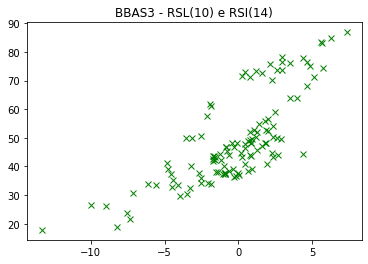

In [29]:
plt.plot(df_mapa["RSL_BBAS"], df_mapa["RSI14_BBAS"], "x", color = "green")
plt.title("BBAS3 - RSL(10) e RSI(14)");

In [35]:
mapa

,Ativo,RSL,RSI14
0,PETR4,-0.510203,44.115539
1,BVSP,-2.660667,36.876241
2,ITUB4,2.099266,53.386460
3,VALE3,-4.670914,40.724499
4,BBDC4,-0.308325,41.506953
5,BBAS3,-1.592935,42.305009


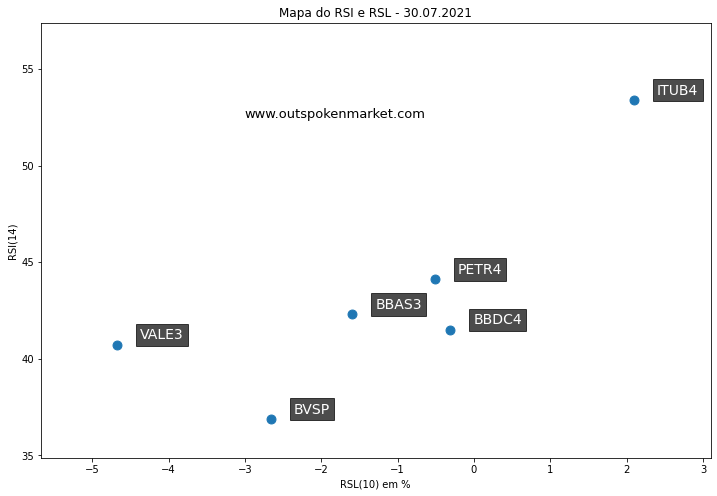

In [37]:
plt.figure(figsize = (12, 8))

plt.scatter(mapa["RSL"], mapa["RSI14"], s = 80)
for i in range(mapa.shape[0]):
    plt.text(x = mapa.RSL[i] + 0.3, y = mapa.RSI14[i] + 0.3 , s = mapa.Ativo[i], 
             fontdict = dict(color = "white", size = 14),
             bbox = dict(facecolor = "black", alpha = 0.7))

plt.xlim(mapa.RSL.min() - 1, mapa.RSL.max() + 1)               
plt.ylim(mapa.RSI14.min() - 2, mapa.RSI14.max() + 4)          

setup = dict(size = 13, color = "black")
plt.text(-3, 52.5, "www.outspokenmarket.com", **setup)

plt.title("Mapa do RSI e RSL - 30.07.2021") 
plt.xlabel("RSL(10) em %")                        
plt.ylabel("RSI(14)")                     
plt.show()